# MLP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
train = pd.read_csv('./datasets/mnist_train.csv',header=None)
test = pd.read_csv('./datasets/mnist_test.csv',header=None)
x_train = train.iloc[:,1:]
x_test = test.iloc[:,1:]
y_train = train.iloc[:,0]
y_test = test.iloc[:,0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
competition = pd.read_csv("./datasets/mnist_competition.csv",header=None)
competition.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def plot_history(history, ax=None):
    if ax is None: fig,axs=plt.subplots(len(history.history.keys()),constrained_layout = True)
    for i,k in enumerate(history.history.keys()):
        axs[i].plot(history.history[k])
        plt.title(f'model {k}')
        axs[i].set(xlabel='epochs', ylabel=f'{k}')
        axs[i].legend(['train', 'test'], loc='upper left')

model accuracy with test data is: 97.78000116348267%


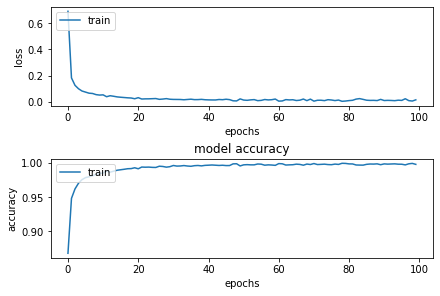

In [9]:
layers = [Dense(128, input_shape=(784,), activation='relu'), 
          Dense(512, activation='relu'),
          Dense(128, activation='relu'),
          Dense(64, activation='relu'),
          Dense(10, activation='softmax')]
model = Sequential()
[model.add(l) for l in layers]
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, batch_size=128,verbose=0)
plot_history(history)
print(f"model accuracy with test data is: {model.evaluate(x_test,y_test,batch_size=128,verbose=0)[1]*100}%")

In [21]:
prediction = model.predict(competition)
result = prediction.argmax(axis=1)
result

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
with open('../00_competition/mlp.txt', 'w') as f:
    for pred in result:
        f.write(str(pred))
        f.write('\n')

In [ ]:
results = pd.DataFrame(columns=['layers', 'architecture', 'parameters', 'epochs', 'batch_size', 'accuracy'])
for epochs in [20]:
    batch_size = 128
    for a in range(1,10):
        for j in range(0,4):
            if j-1 > a: break
            layers = [Dense(2**a, input_shape=(784,), activation='relu')]
            [layers.append(Dense(2**(a-k),activation='relu')) for k in range(0,j)]
            layers.append(Dense(10, activation='softmax'))
            arch = f'784x{2**a}x'
            for k in range(0,j): arch =  arch + f'{2**(a-k)}x' 
            arch = arch + '10'
            model = Sequential()
            [model.add(l) for l in layers]
            model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
            history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=0)
            acc = model.evaluate(x_test,y_test,batch_size=128,verbose=0)[1]
            results.loc[len(results.index)] =[len(layers)-1, arch, model.count_params(), epochs, batch_size, acc]
            print(f"model (#layers={len(layers)-1}, #params={model.count_params()}, arch={arch}, epochs={epochs}) accuracy with test data is: {acc*100}%")

In [11]:
results.head()

,layers,architecture,parameters,epochs,batch_size,accuracy
0,1,784x2x10,1600,20,128,0.1135
1,2,784x2x2x10,1606,20,128,0.1135
2,3,784x2x2x1x10,1599,20,128,0.1135
3,1,784x4x10,3190,20,128,0.5152
4,2,784x4x4x10,3210,20,128,0.6569


In [12]:
results.sort_values('accuracy')

,layers,architecture,parameters,epochs,batch_size,accuracy
0,1,784x2x10,1600,20,128,0.1135
1,2,784x2x2x10,1606,20,128,0.1135
2,3,784x2x2x1x10,1599,20,128,0.1135
6,4,784x4x4x2x1x10,3193,20,128,0.1135
3,1,784x4x10,3190,20,128,0.5152
8,2,784x8x8x10,6442,20,128,0.5386
5,3,784x4x4x2x10,3200,20,128,0.5409
4,2,784x4x4x10,3210,20,128,0.6569
7,1,784x8x10,6370,20,128,0.8004
10,4,784x8x8x4x2x10,6428,20,128,0.8012


In [13]:
results.sort_values('architecture')

,layers,architecture,parameters,epochs,batch_size,accuracy
23,1,784x128x10,101770,20,128,0.9587
24,2,784x128x128x10,118282,20,128,0.9663
25,3,784x128x128x64x10,125898,20,128,0.9704
26,4,784x128x128x64x32x10,127658,20,128,0.9740
11,1,784x16x10,12730,20,128,0.9116
12,2,784x16x16x10,13002,20,128,0.8740
13,3,784x16x16x8x10,13058,20,128,0.9315
14,4,784x16x16x8x4x10,13054,20,128,0.8645
27,1,784x256x10,203530,20,128,0.9605
28,2,784x256x256x10,269322,20,128,0.9722


In [14]:
results.sort_values(["layers","parameters"],ascending=[True, True])

,layers,architecture,parameters,epochs,batch_size,accuracy
0,1,784x2x10,1600,20,128,0.1135
3,1,784x4x10,3190,20,128,0.5152
7,1,784x8x10,6370,20,128,0.8004
11,1,784x16x10,12730,20,128,0.9116
15,1,784x32x10,25450,20,128,0.9420
19,1,784x64x10,50890,20,128,0.9469
23,1,784x128x10,101770,20,128,0.9587
27,1,784x256x10,203530,20,128,0.9605
31,1,784x512x10,407050,20,128,0.9705
1,2,784x2x2x10,1606,20,128,0.1135


<AxesSubplot:xlabel='layers', ylabel='accuracy'>

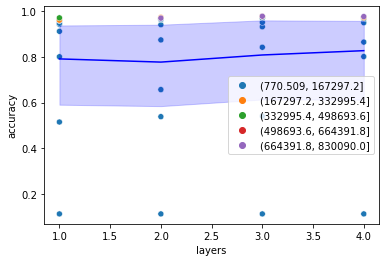

In [15]:
ax = plt.subplot()

sns.scatterplot(ax=ax,x=results['layers'], 
                y=results['accuracy'], 
                color='red', 
                hue=pd.cut(results['parameters'], 
                           bins=5))
sns.lineplot(ax=ax,
             x=results['layers'], 
             y=results['accuracy'], 
             color='blue')

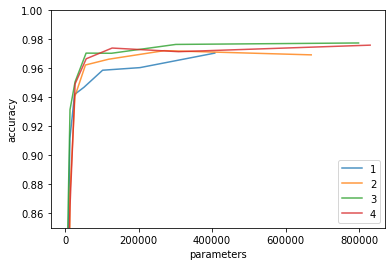

In [16]:
ax = plt.subplot()
ax.set_ylim([0.85,1])
for layer in results['layers'].unique():
    sns.lineplot(ax=ax,x=results[results['layers']==layer]['parameters'], y=results['accuracy'], alpha=0.8, palette=sns.color_palette("tab10")[0:results['layers'].nunique()])
ax.legend(results['layers'].unique())

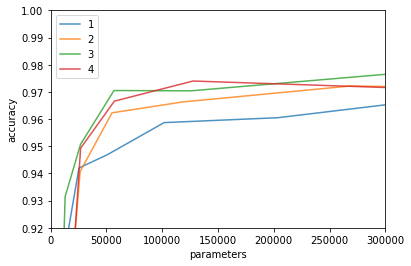

In [17]:
ax = plt.subplot()
ax.set_ylim([0.92,1])
ax.set_xlim([0,300000])
for layer in results['layers'].unique():
    sns.lineplot(ax=ax,x=results[results['layers']==layer]['parameters'], y=results['accuracy'], alpha=0.8, palette=sns.color_palette("tab10")[0:results['layers'].nunique()])
ax.legend(results['layers'].unique())

<AxesSubplot:xlabel='parameters', ylabel='accuracy'>

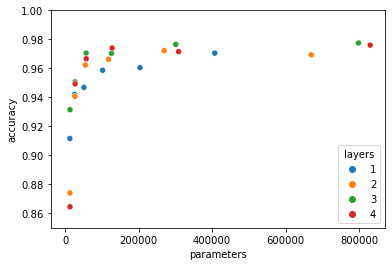

In [18]:
ax = plt.subplot()
ax.set_ylim([0.85,1])
sns.scatterplot(ax=ax,x=results['parameters'], y=results['accuracy'],hue=results['layers'], palette=sns.color_palette("tab10")[0:results['layers'].nunique()]) 

<AxesSubplot:xlabel='parameters', ylabel='accuracy'>

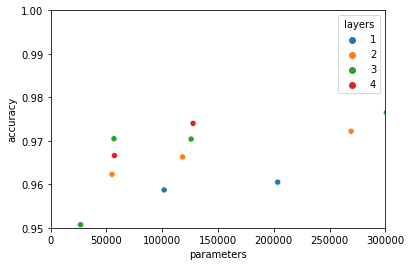

In [19]:
ax = plt.subplot()
ax.set_ylim([0.95,1])
ax.set_xlim([0,300000])
sns.scatterplot(ax=ax,x=results['parameters'], y=results['accuracy'],hue=results['layers'], palette=sns.color_palette("tab10")[0:results['layers'].nunique()]) 

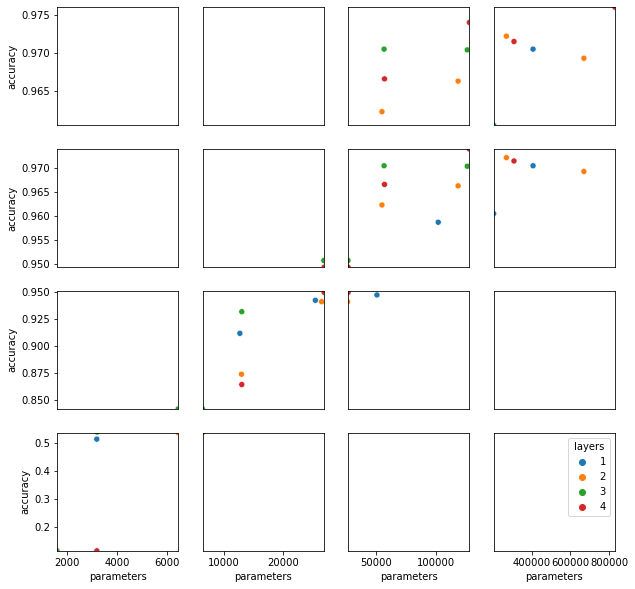

In [20]:
nrows, ncols = 4,4
fig, axs = plt.subplots(nrows,ncols, figsize=(10,10))
x_split = np.array_split(results['parameters'].values, nrows)
y_split = np.array_split(results['accuracy'].values, ncols)
for r1,r2 in zip(range(nrows),range(nrows)[::-1]):
    for c in range(ncols):
        a = axs[r1,c]
        a.set_xlim([x_split[c][0],x_split[c][-1]])
        a.set_ylim([y_split[r2][0],y_split[r2][-1]])
        
        sns.scatterplot(
            ax=a,
            x=results['parameters'], 
            y=results['accuracy'],
            hue=results['layers'], 
            palette=sns.color_palette("tab10")[0:results['layers'].nunique()]) 
        if r1 != nrows-1 or c != ncols-1: a.get_legend().remove()
        if r1 < nrows-1: a.get_xaxis().set_visible(False)
        if c > 0: a.get_yaxis().set_visible(False)
        

## Conclusion
The more layers we add the less the model is sensitive to parameters addition. In other words, if we have many layers, increasing their size has very few effects. On the other hand, with few layers, increasing their size has a strong effect on accuracy. We therefore find out that we already got a pretty good accuracy with only one dense layer of `512` entries. The optimal network size seems to be the one with 4 layers and the architecture `784x512x128x64x10` that sums up to `125898` parameters.